# Probabilidad y Estadística

El objetivo del siguiente notebook es afianzar algunos conceptos de Probabilidad y, de paso, empezar a ver cómo se hacen gráficos con Matplotlib, una nueva librería que veremos más en detalle en la próxima bitácora y encuentro. Por ahora, solamente tienen que instalarla y correr las celdas. ¡No te preocupes si no entiendes lo que hacen esas celdas! Lo importante es que prestes atención a sus resultados.

## 1. Distribuciones de probabilidad

El concepto de distribución de probabilidad es un concepto central en probabilidad y estadística y, por lo tanto, hay mucho para decir. Nos limitamos acá a los puntos más importantes.


### 1.1 Distrubución Uniforme Discreta

Comencemos por un ejemplo: un dado de seis caras. La probabilidad de que al tirar el dado *salga* una cara es $1/6$. Si graficamos la probabilidad para cada resultado posible de tirar un dado, obtendríamos un gráfico como el siguiente:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

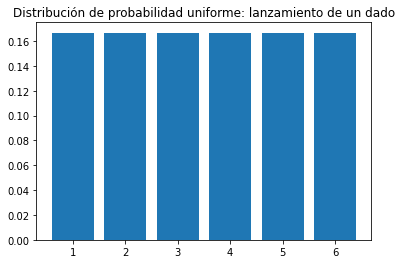

In [ ]:
valores = np.arange(1,7) #genera un arreglo numerico del 1 a 6
probas = np.zeros(6) + 1/6 #genero un vector de tamaño 1x6 con valor 1/6
plt.bar(valores, probas) #genera un grafico de barra donde asigna a los casilleros 1 a 6 los valores de probabilidad
plt.title('Distribución de probabilidad uniforme: lanzamiento de un dado') #genera el titulo
# plt.savefig('distribucion_dado.png', dpi = 400) #guarda la imagen
plt.show() #muestra la imagen 

En este caso, decimos que la distribución de probabilidad es **uniforme discreta**, ya que le asigna la misma probabilidad a los seis valores que pueden salir al tirar el dado. Si el dado estuviera cargado, ya no sería uniforme.

**Algunos detalles**:
1. El resultado de tirar un dado es un ejemplo de una *variable aleatoria*.
2. En el caso del dado, la variable aleatoria puede tomar valores *discretos* y *acotados* (limitados): 1, 2, 3, 4, 5 y 6
3. Existen variables aleatorias donde los posibles valores que puede tomar son continuos y no acotados. Veremos la distribución más famosa de ellas a continuación.

### 1.2 Distribución Normal o Gaussiana

La distribución normal o gaussiana debe ser la distribución más famosa dentro de las distribuciones. Es una distribución de variable continua y aparece en una infinidad de ámbitos de la ciencia. Muchas variables asociadas a fenómenos naturales siguen una distribución gaussiana; un ejemplo típico es la estatura de las personas. La forma que tiene esta distribución está dada por la siguiente fórmula:

$$f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{-(x - \mu)^2}{2\sigma^2}}$$

¡No te asustes si no la entiendes! Durante el encuentro, veremos más en detalle algunos aspectos de esta distribución. Pero es importante resaltar que tiene sólo dos parámetros: su valor medio $\mu$ y su desviacíon estándar $\sigma$. Estos valores son *teóricos*, es decir, son propios de la distribución de probabilidad. 

Recomendamos entrar en la página de Wikipedia de la [Distribución Normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) y prestar atención al primer gráfico - dónde podrán ver la forma teórica de la distribución - y a la sección "Propiedades".


**Distribución Normal en NumPy**

Como mencionamos en el encuentro anterior, NumPy nos provee de herramientas para generar valores aleatorios de distribuciones. A continuación generamos, usando **`np.random.normal()`**, muestras de dos distribuciones normales, con el mismo valor medio pero distinta desviación estándar. **Consultar** la ayuda de la función para entender bien qué hace.

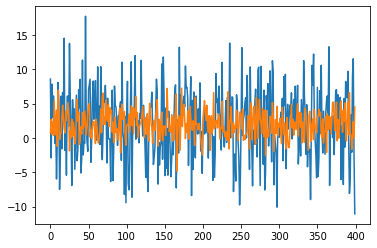

In [ ]:
mu = 2.0
sigma_1 = 5.0
sigma_2 = 2.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 400)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 400)
#print(muestras_1, muestras_2)
plt.plot(muestras_1)
plt.plot(muestras_2)
plt.show()

Notar que son dos "tiras" de números, bastante largas y que a simple vista no nos dicen mucho. Mejor, podemos graficar su histograma. Veremos bien qué es un histograma en la próxima bitácora. Por ahora, basta saber que es una forma de visualizar cómo está distribuida una tira de números. Lo que hace es tomar un número determinado de intervalos (`bins = 20`) y contar cuántas muestras caen en cada intervalo.

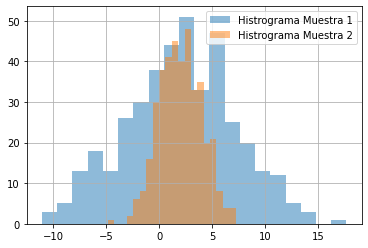

In [ ]:
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 2') #el alfa es la transparencia del grafico
plt.legend()
plt.grid()
plt.show()

**Ejercicio:** Volver a "generar" las muestas y hacer sus histogramas. ¿Cambió?¿Por qué? Googlear que es una *semilla* (`seed`) en NumPy e implementar. También, cambiar la cantidad de muestras, modificando el argumento `size`. 

['randomseed'](https://www.sharpsightlabs.com/blog/numpy-random-seed/#:~:text=NumPy%20random%20seed%20is%20for%20pseudo%2Drandom%20numbers%20in%20Python&text=NumPy%20random%20seed%20is%20simply,random%20numbers%20for%20random%20processes.)
NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes.
['Rseed'](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html)


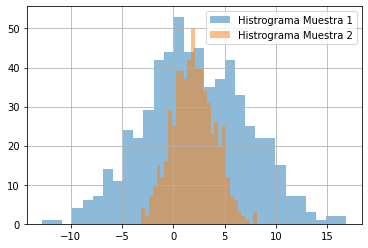

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = 2.0
sigma_1 = 5.0
sigma_2 = 2.0
muestras_1 = np.random.seed(66) 
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 600)
muestras_2 = np.random.seed(31)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 600)


plt.hist(muestras_1, bins = 30, alpha = 0.5, label = 'Histrograma Muestra 1')
plt.hist(muestras_2, bins = 30, alpha = 0.5, label = 'Histrograma Muestra 2') #el alfa es la transparencia del grafico
plt.legend()
plt.grid()
plt.show()



### 1.3 Relación entre Probabilidad y Estadística

**Promedio y desviación estándar en una distribución Normal**

En una distribución normal, el promedio de las muestras obtenidas *tiende* al valor medio $\mu$ de la distribución, y la desviación estándar *tiende* a la desviacíon estándar $\sigma$ de la distribución. Notar, entonces, que existen valores calculados (promedio, desviación estándar) y valores teóricos ($\mu$ y $\sigma$). Confundirlos entre sí es un error común.

Veamos un ejemplo. Nuevamente, obtenemos muestras de una distribución normal:

In [ ]:
mu = 8.5
sigma = 3.0
muestras = np.random.normal(loc = mu, scale = sigma, size = 1500)

Y calculamos su promedio y desviación estándar, y comparamos con $\mu$ y $\sigma$.

In [ ]:
print('Valor medio teorico:', mu, '. Valor medio calculado:', muestras.mean()) 
print('Desviacion estandar teorica:', sigma, '. Desviacion estandar calculada:', muestras.std())
#uno depende de la muestra y el otro es el valor teorico de la poblacion donde salio la muestra

Valor medio teorico: 8.5 . Valor medio calculado: 8.133872125678922
Desviacion estandar teorica: 3.0 . Desviacion estandar calculada: 2.827993668107104


Comparemos el histograma de las muestras y la distribución teórica, que graficaremos haciendo uso de la librería `SciPy`:

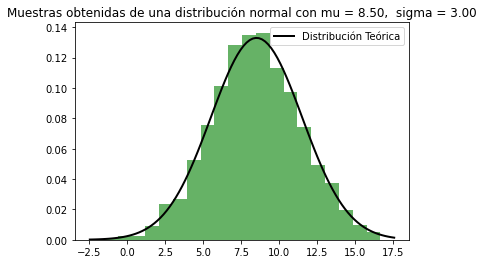

In [ ]:
from scipy.stats import norm  #importo funcion normal de science python  stadistica

plt.hist(muestras, bins=20, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim() #indico los limites en donde se mueve la variable x en el grafico
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma) #genera una distribucion de probabilidad Normal con media mu y desvio sigma
plt.plot(x, p, 'k', linewidth=2, label = 'Distribución Teórica') #grafico los valores de mi muestra discreta vs la distribucion de probabilidad de mi muestra normal de la poblacion continua
title = "Muestras obtenidas de una distribución normal con mu = %.2f,  sigma = %.2f" % (mu, sigma) #inserta los valores donde tengo %

plt.title(title)
plt.legend()
plt.show()

**Nota:** si estás atento/a a la escala en el eje *y*, notarás que es distinta a la escala de los histogramas anteriores. Esto se debe a que, en un histograma, además de graficar la cantidad de muestras que entran en cada intervalo, podemos también graficar la **proporción** de muestras que entran en cada intervalo.

**Para pensar y probar:** 

**1. ¿Por qué no coinciden $\mu$ y $\sigma$ con los valores calculados?¿Qué podemos hacer para que se parezcan cada vez más?¿Y qué ocurre en ese caso con el histograma y la distribución teórica?**
 
  No coinciden porque los valores calculados son una muestra de la poblacion teorica total.
Para que se parezcan mas el tamaño de la muestra debe ser mayor. cuanto mayor sea más se parecerá a la poblacion teorica.
En ese caso el histograma se irá pareciendo ala forma teorica.

**2. Con respecto al ejercicio que acabamos de hacer, ¿cuáles son los *parámetros* asociados al mundo de las probabilidades y cuáles son los *valores estadísticos* asociados al mundo de la estadística?**

Los parametros del mundo de probabilidades son los valores de probabilidad dados por la distribución normal y los valores estadisticos son aquellos encontrados con mi muestra en el histograma


### Ejercitación
 
Los siguientes ejercicios pueden parecer muy difíciles, pero te aseguramos que no lo son tanto. ¡Lo importante es que los intentes!

**Ejercicio 1 - Challenge:** Muchos juegos de mesa requieren tirar dados y sumar sus resultados. Por ejemplo, el [Catán](https://es.wikipedia.org/wiki/Los_Colonos_de_Cat%C3%A1n). Es evidente que, mientras en un dado la probabilidad de que salga cada cara es la misma, en esta variable aleatoria todos los resultados no son igual de probables (¿Cuáles son los posibles resultados?). Entonces, para mejorar tu estrategia en estos juegos, es útil saber cuál es la probabilidad asociada a cada resultado. Para ello, debes calcular su distribución de probabilidad. Entonces, 

Obtener la distribución de la variable aleatoria *suma del resultado de tirar dos dados*. Para ello puedes intentar alguna o ambas de las siguientes opciones:
1. **Obtener la distribución teórica:** para ello, basta contar los casos *a mano* con lápiz y papel. Por ejemplo:
    1. Uno (1) es un resultado imposible
    2. Dos (2) solamente puede ser obtenida con ambos dados en 1, 1 + 1 (1 comb)
    3. Tres (3) tiene dos opciones, 2 + 1 y 1 + 2 (2 comb)
    4. Cuatro (4) tiene tres opciones: 3 + 1, 2 + 2, 1 + 3 (3 comb)
    
    y así para el resto de los posibles resultados. Completa la lista hasta el 12 y cuenta cuántas combinaciones existen para cada resultado. ¿Cuántos combinaciones debe haber en total, teniendo en cuenta que cada dado tiene seis caras?
     5. 1+4, 2+3,3+2,4+1 (4 comb)
     6. 1+5, 2+4, 3+3, 4+2, 5+1 (5 comb)
     7. 1+6, 2+5, 3+4, 4+3, 5+2, 6+1 (6 comb)
     8. 2+6, 3+5, 4+4, 5+3, 6+2 (5 comb)
     9. 3+6, 4+5, 5+4, 6+3 (4 comb)
     10. 4+6, 5+5, 6+4(3 comb)
     11. 5+6, 6+5(2 comb)
     12.  6+6

Hay N=n1*n2 posibles combinaciones = 36 combinaciones de pares ordenados
(principio multiplicativo)
     Al final, debes llevarlos a porcentaje. Por ejemplo, si en total son 100 posibles combinaciones, y el 12 tiene 10 posibles combinaciones, su probabilidad es 10/100 = 0.1
     
     1. 0
     2. 1/36
     3. 2/36
     4. 3/36
     5. 4/36
     6. 5/36
     7. 6/36
     8. 5/36
     9. 4/36
     10. 3/36
     11. 2/36
     12. 1/36
 
    
2. **Simular y obtener una distribución aproximada:** otra opción es simular esta situación. Viste en el notebook de la bitácora anterior cómo simular un dado. Ahora simula dos dados y obtiene la suma de sus resultados.

¿Te animas a comparar ambos métodos?

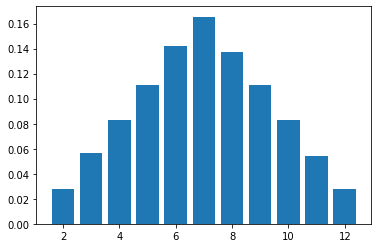

0.16666666666666666


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dado1 = np.random.randint(1,7, size = 50000)
dado2 = np.random.randint(1,7, size = 50000)

suma = dado1+dado2

plt.hist(suma, bins = np.arange(1.5,13.5,1), density=True, rwidth = 0.8,) #density me muestra las probabilidades de cada valor sobre el total de combinaciones
plt.show()
#tengo dos dados con tirada aleatoria, cuanto mayor es el tamaño de la muestra, mayor son las combinaciones posibles y se ajusta al valor teorico simulado
#con mayor probabilidad en el valor 7 que tiene mas posibles combinaciones p=6/36=1/6

**Ejercicio 2:** Obtiene, simulando, la distribución de la variable aleatoria *máximo valor obtenido al tirar dos dados.* Por ejemplo, si obtenemos 2 y 5, el resultado es 5. 

**Nuevamente, si lo deseas, también puedes contar casos y obtener la distribución teórica.**

Combinaciones posibles de maximos (triangulo pitagorico)

    1. Uno (1) es un resultado imposible
    2.  1 + 1 (1 comb) 
    3.  2 + 1 y 1 + 2 (2 comb) 
    4. 3 + 1, 2 + 2, 1 + 3 (3 comb) 
     5. 1+4, 2+3, 3+2, 4+1 (4 comb) 
     6. 1+5, 2+4, 3+3, 4+2, 5+1 (5 comb) 
     7. 1+6, 2+5, 3+4, 4+3, 5+2, 6+1 (6 comb) 
     8. 2+6, 3+5, 4+4, 5+3, 6+2 (5 comb) 
     9. 3+6, 4+5, 5+4, 6+3 (4 comb) 
     10. 4+6, 5+5, 6+4(3 comb) 
     11. 5+6, 6+5(2 comb) 
     12.  6+6 (1 comb) 
     del total de 36 combinaciones se obtiene que tengo maximos
     1-->1 vez  -->la probabilidad de que 1 sea maximo es p=1/36
     2-->3 veces-->la probabilidad de que 2 sea maximo es p=3/36 
     3-->5 veces-->la probabilidad de que 3 sea maximo es p=5/36
     4-->7 veces-->la probabilidad de que 4 sea maximo es p=7/36
     5-->9 veces-->la probabilidad de que 5 sea maximo es p=9/36
     6-->11 veces-->la probabilidad de que 6 sea maximo es p=11/36=0,3...

(2, 5000)


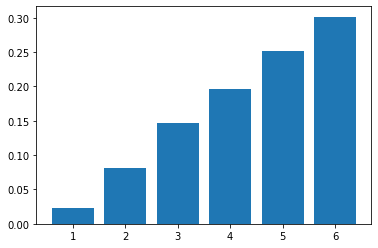

0.3055555555555556


In [ ]:
dado1 = np.random.randint(1,7, size = 5000)
dado2 = np.random.randint(1,7, size = 5000)

'''Combinamos las muestras obtenidas en un arreglo de dos filas, donde
cada columna corresponde a una tirada'''
muestras = np.array([dado1,dado2]) #arreglo de dos filas N columnas
print(muestras.shape)


'''Obtenemos el máximo de cada tirada. Recordar obtener el máximo
en el eje (axis) correspondiente'''
maximos = np.max(muestras, axis = 0)

plt.hist(maximos, bins = np.arange(0.5,7.5,1), density=True, rwidth = 0.8)
plt.show()
#la distribucion aleatoria de los valores maximos es asimetrico hacia los valores mayores del dado, porque la combinacion mas probable (el 7) tiene un 6,5,4 
#que es hacia donde se corren los maximos


## 2. Correlación

El objetivo de esta sección es que te familiarices con los conceptos de **Covarianza** y **Correlación**. Si bien las fórmulas parecen difíciles, esperemos que veas que nada es tan grave como parece. También que prestes atención a cómo a veces es útil simular datos para aprender o acercarse a algunas técnicas.

Tenemos dos variables aleatorias $X$ e $Y$, de las cuales tenemos $n$ muestras de cada una, $x_1,x_2,..., x_n$ e $y_1,y_2,..., y_n$. Sus valores medios son $\bar{x}$ e $\bar{y}$, respectivamente. Definimos la Covarianza como

$$Cov(X,Y) = \sum_{i=1}^{n} \frac{(x_i - \bar{x})(y_i - \bar{y})}{n}$$

A veces verás que, en lugar de dividir por $n$, se divide por $n - 1$ ó $n - 2$, pero eso no es importante ahora. Según Wikipedia, 
**la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión.**

Si bien la fórmula puede parecer difícil, veamos qué nos dice de nuestros datos simulando algunos casos sencillos.

Empezamos generandos muestras al azar de dos variables aleatorias no relacionadas entre sí. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

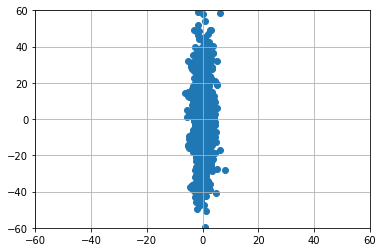

In [2]:
n = 1000
sigma_1 = 2
sigma_2 = 20
x = np.random.normal(size = n, scale = sigma_1)
y = np.random.normal(size = n, scale = sigma_2)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.show()

¿Hay alguna relación entre ellos? Por relación nos referimos a "variación conjunta". Y por "variación conjunta" podemos imaginarnos que si una de las variables aumenta, la otra también lo hace. Y si una variable disminuye su valor, la otra también lo hace. La covarianza intenta cuantificar esa relación.

In [3]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

0.049614760997614436


La covarianza, sin embargo, tiene un pequeño problema: depende de la escala de nuestros datos. Entonces, para deshacernos de la escala, se puede definir la Correlación, que no es otra cosa que la covarianza dividida la desviación estándar de cada variable aletaria.

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [ ]:
corr = cov/(x.std()*y.std()) #coeficiente de correlacion lineal
print(corr)

0.03846883858671375


Y con eso nos deshacemos de la escala. Un valor cercano a cero nos indica que no existe una relación (¿lineal?) entre las variables.


**Probar** con distintas escalas (modificando sigma_1 y sigma_2) y verán que cov tomará valores en un rango muy amplio, mientras que corr se mantendrá cercana a cero.

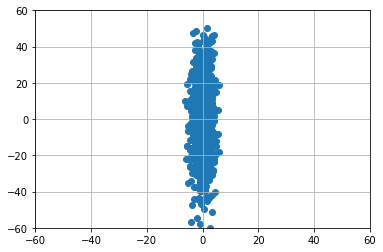

1.759861331625792
[[  4.01170238   1.76162295]
 [  1.76162295 401.84076545]]
0.043875452767877014
[[1.         0.04387545]
 [0.04387545 1.        ]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
n = 1000
sigma_1 = 2
sigma_2 = 20
x = np.random.normal(size = n, scale = sigma_1)
y = np.random.normal(size = n, scale = sigma_2)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.show()

cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

cov_fun=np.cov(x,y)
#https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/#:~:text=The%20covariance%20matrix%20can%20be,as%20one%20for%20each%20variable.
#https://numpy.org/doc/stable/reference/generated/numpy.cov.html
print(cov_fun)

corr = cov/(x.std()*y.std())
print(corr)
corr_fun=np.corrcoef(x,y)
print(corr_fun)
#https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
#devuelve la matriz de covarianza y correlacion. en la diagonal son las autocovarianzas y fuera los coeficientes que quiero


### 2.1 Relación lineal

Veamos otro ejemplo: sabemos que existe una relación lineal entre $X$ e $Y$, es decir, podemos aproximar $Y =aX+b$, donde $a$ y $b$ son la pendiente y la ordenada al origen.

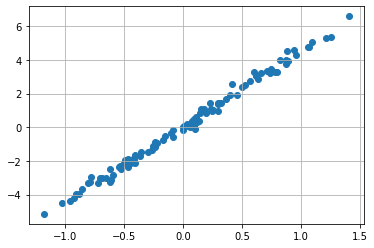

In [ ]:
n = 100
x = np.linspace(-1,1,n) + 0.25*np.random.normal(size = n )#el 0.25 le da'importancia´de los datos, en este caso menor al valor que quiero de x en la ordenada
#como una funcion poblacional 0.25 me genera la amplificacion, o grado de importancia que le damos al ruido o la ordenada..np.random.normal para darle aleatoriedad al proceso. y el linespace le da la parte deterministica.
y = 4.5*x + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()


La covarianza nos da

In [ ]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)
cov_fun=np.cov(x,y)
print(cov_fun)

1.6413673025738185
[[0.36760209 1.65794677]
 [1.65794677 7.52562682]]


In [ ]:
corr = cov/(x.std()*y.std())
print(corr)

corr_fun=np.corrcoef(x,y)
print(corr_fun)


0.9968051102640811
[[1.         0.99680511]
 [0.99680511 1.        ]]


Ahora, en cambio, el valor es cercano a uno, indicando una relación lineal creciente entre ambas variables.



**Probar** cambiando la pendiente de la función lineal (el número que multiplica a `x` en `y = ...`) y mirar qué pasa. ¿Qué pasa si la pendiente es negativa?


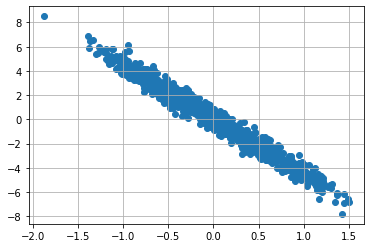

-1.805815580835801
[[ 0.39996552 -1.8076232 ]
 [-1.8076232   8.40352145]]
-0.9859751645472602
[[ 1.         -0.98597516]
 [-0.98597516  1.        ]]


In [ ]:
n = 1000
x = np.linspace(-1,1,n) + 0.25*np.random.normal(size = n)
y = -4.5*x + 0.5*np.random.normal(size = n) #si la pendiente es negativa la relacion x e y es inversa.

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)
cov_fun=np.cov(x,y)
print(cov_fun)

corr = cov/(x.std()*y.std())
print(corr)

corr_fun=np.corrcoef(x,y)
print(corr_fun)


#### Conclusiones

1. La covarianza es una medida de la variación conjunta de dos variables. Pero tiene un problema: depende de la escala.
2. Para "deshacernos" de la escala, definimos la correlación, que es simplemente la covarianza dividida por el producto de la desviación estándar de cada variable. 
**Para pensar:** ¿por qué la desviación estándar está asociada a la escala de una variable?
Porque esta directamente relacionada con la medida de la variable.

3. La correlación es un valor entre -1 y 1. La correlación toma un valor cercano a uno cuando hay una relación lineal creciente entre las variables, cero cuando no hay relación y -1 cuando hay una relación lineal decreciente.

4. Esta correlación tiene un nombre particular: **Correlación de Pearson**.['Coef Pearson'](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)

### 2.2 Covarianza y Correlación con NumPy

**Esta sección es opcional**

NumPy ya tiene incorporadas funciones que calculan la covarianza y la correlación entre dos variables. La única diferencia es que, en lugar de devolver un único valor, devuelve cuatro valores, que corresponden a la covarianza/correlación entre $X$ con $X$, $X$ con $Y$, $Y$ con $X$, e $Y$ con $Y$. 

¿Por qué, en la correlación, algunos valores son exactamente uno (1.)?
Porque esta calculando la correlacion con sigo mismo, son los de la diagonal.

In [ ]:
np.cov([x,y])

array([[ 0.39996552, -1.8076232 ],
       [-1.8076232 ,  8.40352145]])

In [ ]:
np.corrcoef([x,y])

array([[ 1.        , -0.98597516],
       [-0.98597516,  1.        ]])

### 2.3 Relación No-Lineal entre variables

**Esta sección es opcional, pero recomendamos leerla**

¿Qué ocurre cuando la relación no es lineal entre las variables? Veámoslo con un ejemplo.

La correlacion entre las variables es cercana a cero, ya que la correlacion mide la variacion lineal.

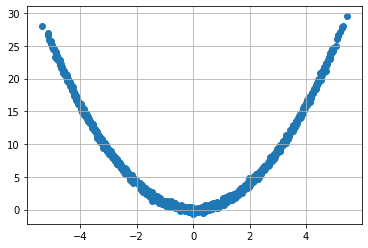

In [ ]:
n = 1000
x = np.linspace(-5,5,n) + 0.25*np.random.normal(size = n)
y = x**2 + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

La covarianza nos da

In [ ]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

-0.03552383686802023


In [ ]:
corr = cov/(x.std()*y.std())
corr

-0.00161180841173117

Notar que la correlación de un valor alrededor de cero, indicando que no hay una correlación entre ambas variables. Pero esto NO indica que no hay una *relación* entre esas variables, solamente nos dice que **no es lineal**. Por eso es muy importante graficar.


**Probar** cambiando la relación matemática entre `x` e `y` y mirar qué pasa.

Para tratar con relaciones no lineal entre variables, existen otros tipos de correlaciones. La que vimos se llama **Correlación de Pearson**, que es la más famosa. Pero también existen otras, Spearman y Kendall, que son muy útiles cuando existe una relación no lineal entre variables.

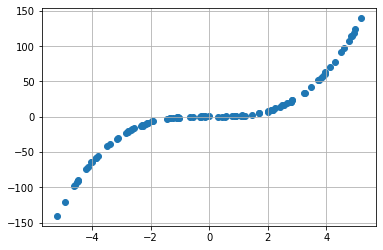

135.07642980167836
0.9100581943338617


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.linspace(-5,5,n) + 0.25*np.random.normal(size = n)
y = x**3 + 0.6*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()
#covarianza
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)
#coef corr
corr = cov/(x.std()*y.std())
print(corr)
#en este caso que es cubico tiene una buena correlacion pero no se ajusta exactamente a una lineal porque no lo es.


### 3. Correlación en Pandas

Probablemente ya estés un poco mareado/a con tantos términos, conceptos y líneas de código. Si no entendiste del todo lo anterior, no te preocupes. Vamos a ver cómo lo aplicamos en un conjunto de datos. ¡Verás que es muy sencillo!

Para eso, volvemos a usar el Iris Dataset del encuentro anterior.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/DS_Bitácora_04_Iris.csv') #subido desde colab
#DS_Bitácora_04_Iris.csv')
data.drop(columns = 'Id', inplace = True) #remuevo la columna id
data.head() #veo los primeros 5 elementos

FileNotFoundError: ignored

Para obtener las correlaciones entre las distintas variables, simplemente tenemos que hacer:

In [ ]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**Para responder**: 
  1. ¿Cuáles variables están correlacionadas entre sí?

  las variables más correlacionadas entre sí de forma lineal son el ancho del petalo con la longitud del mismo de manera directa con R=0.96.  le sigue la relacion entre el largo del petalo y el largo de sepal R=0,87. luego la relacion indirecta con poca significancia con las demas.

  2. ¿Por qué los elementos de la diagonal son exactamente uno (1.0)? 
  
  Esto es porque es correlacionar una variable consigo misma.

Dentro de dos encuentros veremos una forma más eficiente de visualizar esta información, ¡pero ya puedes aplicarla!